<a href="https://colab.research.google.com/github/nousheen05/nousheen05/blob/main/imp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt


In [ ]:
#data collection or loading the data to dataframe

data = pd.read_csv('Restaurant reviews.csv')

In [ ]:
data.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


In [ ]:
import nltk
nltk.download('vader_lexicon')

#preprocessing of data or adding sentiment column to the data

from nltk.sentiment import SentimentIntensityAnalyzer

X = data['Review']

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Generate sentiments for each review
sentiments = []
for review in X:
    sentiment_scores = analyzer.polarity_scores(str(review))
    if sentiment_scores['compound'] > 0 :
        sentiment = 'positive'
    elif sentiment_scores['compound'] == 0:
      sentiment = 'neutral'
    else:
      sentiment = 'negative'
    sentiments.append(sentiment)

# Create a new column for sentiments
data['sentiment'] = sentiments
Y = data['sentiment']

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!




If you don't have a pre-labeled sentiment column in your dataset, you'll need to generate sentiments for your reviews. One common approach is to use a pre-trained sentiment analysis model, such as VADER (Valence Aware Dictionary and sEntiment Reasoner). VADER is a rule-based model specifically designed for sentiment analysis of social media texts.

In [ ]:
# after adding sentiment column
data.head(200)

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,sentiment
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0,positive
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0,positive
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0,positive
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0,positive
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0,positive
...,...,...,...,...,...,...,...,...
195,Paradise,Rathod Sangeetha,Chiken musallam was really good and in dat we ...,5,"1 Review , 2 Followers",5/10/2019 22:29,0,positive
196,Paradise,Dinesh Chandra,Experienced the best haleem here. Murg Musalam...,5,"2 Reviews , 34 Followers",5/10/2019 22:26,0,positive
197,Paradise,Ihita Singh,Nyc restaurant.. should come and taste haleem ...,5,"1 Review , 2 Followers",5/10/2019 21:53,0,positive
198,Paradise,Chalapathi Chalapathi,"It's is very tasty and very good for health,ha...",5,"1 Review , 5 Followers",5/10/2019 21:52,0,positive


In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In step 2, we split the data into training and testing sets to ensure that our sentiment analysis model is trained on a subset of the data and evaluated on a separate subset. Here's an explanation of the process:

1.Load the Dataset: We start by loading the dataset, which typically consists of features (e.g., reviews) and labels (e.g., sentiments). In our case, we assume that the dataset is stored in a CSV file and contains a 'text' column for reviews.

2.Preprocess the Dataset: After loading the dataset, we preprocess it as needed. This may involve removing missing values, cleaning the text, handling outliers, or any other necessary data cleaning steps.

3.Split the Dataset: The next step is to split the dataset into training and testing sets. This is done using the train_test_split function from scikit-learn. The function takes the features (X) and labels (y) as inputs and randomly shuffles the data before dividing it into two subsets.

In the code above, X represents the reviews (features), and y represents the sentiments (labels). The test_size parameter is set to 0.2, indicating that we want to allocate 20% of the data for testing, while the remaining 80% will be used for training. The random_state parameter is set to 42 to ensure reproducibility of the split.

The training set is used to train the sentiment analysis model, while the testing set is used to evaluate its performance and assess its ability to generalize to unseen data.

By splitting the data in this way, we can validate the model's performance on data it has never encountered during the training process. This helps us gain insights into how well the model will perform on new, unseen reviews or datasets.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TfidfVectorizer
vectorizer = TfidfVectorizer()

# Clean the text data to handle NaN values
X_train_cleaned = X_train.fillna('')  # Replace NaN values with an empty string
X_test_cleaned = X_test.fillna('')

# Vectorize the cleaned training data
X_train_vectorized = vectorizer.fit_transform(X_train_cleaned)

# Vectorize the cleaned testing data
X_test_vectorized = vectorizer.transform(X_test_cleaned)


Certainly! Step 3 involves vectorizing the text data in order to represent it in a numerical format that can be used as input to the machine learning model. Let's break down the process of text vectorization:

Import the Required Libraries: Before proceeding with text vectorization, make sure you have the necessary libraries imported. In this case, we need the TfidfVectorizer from scikit-learn.
python
Copy code
from sklearn.feature_extraction.text import TfidfVectorizer
Create a TfidfVectorizer: The TfidfVectorizer is a commonly used vectorizer for text data. It converts a collection of text documents into a matrix of TF-IDF features. TF-IDF stands for Term Frequency-Inverse Document Frequency, which is a numerical statistic used to reflect the importance of a word in a document relative to a collection of documents.
python
Copy code
vectorizer = TfidfVectorizer()
Fit and Transform the Training Data: To vectorize the training data, we need to fit the vectorizer on the training text data and then transform the text into numerical feature vectors.
python
Copy code
X_train_vectorized = vectorizer.fit_transform(X_train)
The fit_transform() method fits the vectorizer on the training data (X_train) and transforms it into a matrix of TF-IDF features. The resulting X_train_vectorized will be a sparse matrix representation of the training text data, where each row represents a document (review) and each column represents a unique word (feature).

Transform the Testing Data: After fitting the vectorizer on the training data, we can transform the testing text data (X_test) into numerical feature vectors using the same vectorizer.
python
Copy code
X_test_vectorized = vectorizer.transform(X_test)
The transform() method applies the same vectorization scheme learned from the training data to the testing data. This ensures that the testing data is transformed using the same vocabulary and feature representation as the training data.

At this point, we have successfully transformed the text data into numerical feature vectors using TF-IDF vectorization. The resulting X_train_vectorized and X_test_vectorized matrices can be used as input to train and evaluate the machine learning model, respectively.

Note that the vectorizer is fitted only on the training data to avoid any information leakage from the testing data. The goal is to ensure that the model learns from the training data and generalizes well to unseen text data.

In [ ]:
# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train_vectorized, y_train)


RandomForestClassifier(random_state=42)

Certainly! Step 4 involves training a random forest classifier on the vectorized training data. Let's go through the process in detail:

Import the Required Libraries: Before proceeding with training the random forest classifier, make sure you have the necessary libraries imported. In this case, we need the RandomForestClassifier from scikit-learn.
python
Copy code
from sklearn.ensemble import RandomForestClassifier
Create a Random Forest Classifier: The RandomForestClassifier is a popular ensemble learning method that combines multiple decision trees to make predictions. It is known for its ability to handle complex relationships in the data and provide robust predictions.
python
Copy code
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
In the code above, we create an instance of the RandomForestClassifier. The n_estimators parameter determines the number of decision trees to be used in the random forest. You can adjust this value based on the complexity of your problem and available computational resources. The random_state parameter is set to 42 to ensure reproducibility of the results.

Train the Classifier: To train the random forest classifier, we need to fit it on the vectorized training data and corresponding sentiment labels.
python
Copy code
rf_classifier.fit(X_train_vectorized, y_train)
The fit() method trains the random forest classifier using the training features (X_train_vectorized) and their corresponding labels (y_train). It learns the patterns and relationships in the training data to make predictions later.

After executing this step, the random forest classifier is trained and ready to make predictions on new, unseen data.

By training the random forest classifier, we create an ensemble of decision trees that collectively learn patterns from the training data. This ensemble can capture complex relationships between the text features and the corresponding sentiments, enabling the model to make accurate predictions.

Remember to replace X_train_vectorized and y_train with your actual vectorized training data and corresponding labels.

Once you have trained the random forest classifier, you can proceed with the remaining steps of making predictions, evaluating the model's performance, and visualizing the results.

In [ ]:

from sklearn.metrics import accuracy_score, confusion_matrix
# Make predictions on the test set
y_pred = rf_classifier.predict(X_test_vectorized)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

# Print the accuracy and confusion matrix
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion_mat)


Accuracy: 0.866
Confusion Matrix:
 [[ 166    6  196]
 [   6  101   37]
 [  15    8 1465]]


Certainly! Step 5 involves making predictions using the trained random forest classifier and evaluating the model's performance using metrics such as accuracy and confusion matrix. Let's break down the process in detail:

Import the Required Libraries: Before proceeding with making predictions and evaluating the model, make sure you have the necessary libraries imported. In this case, we need the accuracy_score and confusion_matrix functions from the sklearn.metrics module.
python
Copy code
from sklearn.metrics import accuracy_score, confusion_matrix
Make Predictions on the Test Set: Once the random forest classifier is trained, we can use it to make predictions on the test set. This is done by applying the predict() method on the vectorized test data.
python
Copy code
y_pred = rf_classifier.predict(X_test_vectorized)
The predict() method takes the vectorized test data (X_test_vectorized) as input and returns the predicted labels (y_pred) for each instance in the test set.

Evaluate the Model: After making predictions, we can evaluate the model's performance using various metrics. In this case, we'll calculate the accuracy and generate the confusion matrix.
Accuracy: The accuracy metric measures the proportion of correctly predicted labels to the total number of instances in the test set.
python
Copy code
accuracy = accuracy_score(y_test, y_pred)
The accuracy_score() function takes the true labels (y_test) and the predicted labels (y_pred) as input and calculates the accuracy.

Confusion Matrix: The confusion matrix is a table that shows the counts of true positive, true negative, false positive, and false negative predictions.
python
Copy code
confusion_mat = confusion_matrix(y_test, y_pred)
The confusion_matrix() function takes the true labels (y_test) and the predicted labels (y_pred) as input and generates the confusion matrix.

Print the Evaluation Metrics: Finally, we print the accuracy and confusion matrix to assess the performance of the random forest classifier.
python
Copy code
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion_mat)
By printing these metrics, we can analyze the accuracy of the model's predictions and gain insights into how well it performed in classifying sentiments.

Please ensure that you have replaced X_test_vectorized, y_test, and y_pred with your actual test data, true labels, and predicted labels.

This evaluation step helps us understand the effectiveness of the trained random forest classifier and its ability to correctly classify sentiments on unseen data.

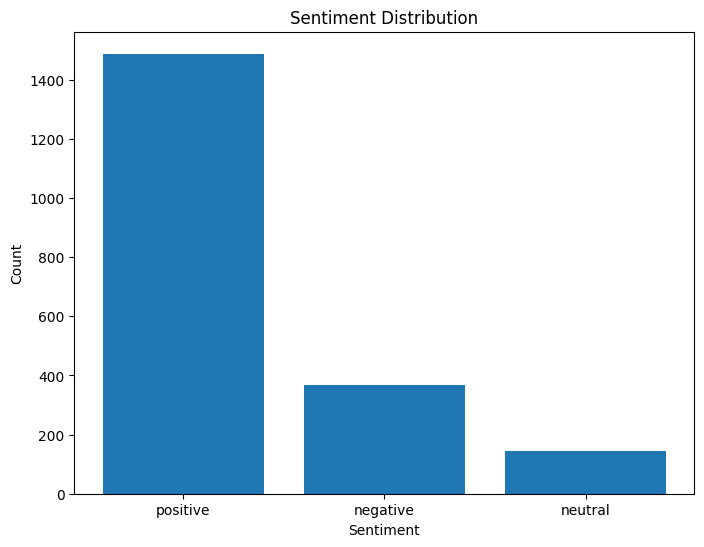

In [ ]:
# Count the occurrences of each sentiment in the test set
sentiment_counts = y_test.value_counts()

# Plot the sentiment distribution as a bar chart
plt.figure(figsize=(8, 6))
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.show()


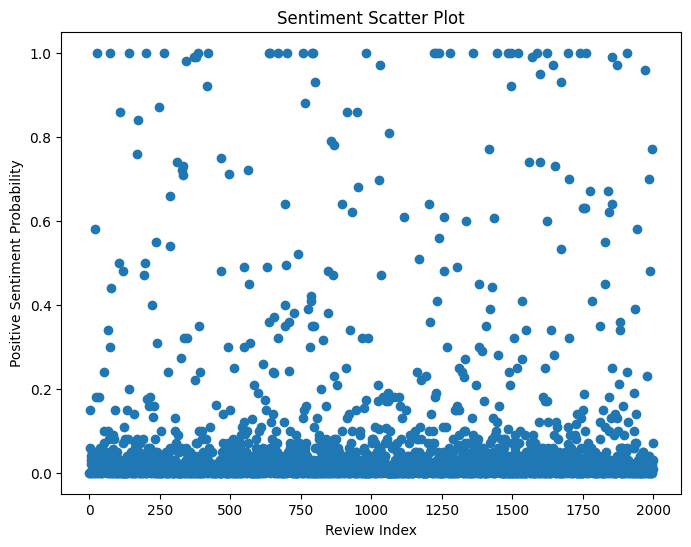

In [ ]:
# Generate sentiment probabilities for each review in the test set
probabilities = rf_classifier.predict_proba(X_test_vectorized)

# Extract probabilities for the positive sentiment class
positive_probabilities = probabilities[:, 1]

# Plot a scatter plot of sentiment probabilities
plt.figure(figsize=(8, 6))
plt.scatter(range(len(X_test)), positive_probabilities)
plt.xlabel('Review Index')
plt.ylabel('Positive Sentiment Probability')
plt.title('Sentiment Scatter Plot')
plt.show()


In [ ]:


# Filter the dataset based on restaurant names
restaurant1 = data[data['Restaurant'] == 'Paradise']
restaurant2 = data[data['Restaurant'] == 'Beyond Flavours']

# Calculate sentiment counts for each restaurant
restaurant1_sentiments = restaurant1['sentiment'].value_counts()
restaurant2_sentiments = restaurant2['sentiment'].value_counts()

# Plot bar graphs for each restaurant
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.bar(restaurant1_sentiments.index, restaurant1_sentiments.values)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution - Restaurant 1')

plt.subplot(1, 2, 2)
plt.bar(restaurant2_sentiments.index, restaurant2_sentiments.values)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution - Restaurant 2')

plt.tight_layout()
plt.show()


KeyError: ignored